<a href="https://colab.research.google.com/github/Sirfowahid/Concrete_Compressive_Strength_Analysis_Using_ML/blob/main/CCSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# New Section

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display
display.set_matplotlib_formats('svg')

<ipython-input-2-22e9b1a8b4d2>:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Projects/01. Concrete Compressive Strength Analysis using Machine Learning/M_482.csv')

In [4]:

data.head()

,Water (kg/m?),Cement (kg/m?),Fine Aggregate (kg/m?),Coarse Aggregate (kg/m?),Hearthstone (kg/m?),Fly Ash (kg/m?),Super Plasticizer (kg/m?),Actual Concrete Strength (MPa)
0,133.0,306.0,868.0,866.0,16.1,191.0,20.6,51.0
1,156.0,377.0,818.0,816.0,19.8,180.0,16.5,55.0
2,180.0,447.0,768.0,766.0,23.6,169.0,11.7,51.0
3,141.0,291.0,868.0,866.0,15.3,191.0,18.3,45.0
4,164.0,360.0,818.0,816.0,18.9,180.0,14.1,52.0


In [5]:
data.dtypes

Water (kg/m?)                     float64
Cement (kg/m?)                    float64
Fine Aggregate (kg/m?)            float64
Coarse Aggregate (kg/m?)          float64
Hearthstone  (kg/m?)              float64
Fly Ash (kg/m?)                   float64
Super Plasticizer (kg/m?)         float64
Actual Concrete Strength (MPa)    float64
dtype: object

In [6]:
X = data.drop('Actual Concrete Strength (MPa)',axis=1)

In [ ]:
X.head()

,Sl. No.,Water (kg/m3),Cement (kg/m3),Fine Aggregate (kg/m3),Coarse Aggregate (kg/m3),Hearthstone (kg/m3),Fly Ash (kg/m3),Super Plasticizer (kg/m3)
1,1.0,0.119,0.442,0.663,0.544,0.043,0.579,0.758
2,2.0,0.285,0.577,0.624,0.481,0.053,0.545,0.607
3,3.0,0.458,0.710,0.584,0.418,0.063,0.512,0.431
4,4.0,0.177,0.413,0.663,0.544,0.041,0.579,0.674
5,5.0,0.343,0.545,0.624,0.481,0.050,0.545,0.519


In [7]:
y = data['Actual Concrete Strength (MPa)']

In [9]:
X.describe()

,Water (kg/m?),Cement (kg/m?),Fine Aggregate (kg/m?),Coarse Aggregate (kg/m?),Hearthstone (kg/m?),Fly Ash (kg/m?),Super Plasticizer (kg/m?)
count,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000
mean,185.000228,280.774564,829.705996,854.319087,74.750975,91.501183,4.500290
std,29.178277,91.716982,176.109870,144.713529,79.494542,68.295595,4.094371
min,116.500000,74.000000,30.000000,436.000000,0.000000,0.000000,0.000000
25%,164.215000,211.700000,746.850000,771.325000,0.000000,42.125000,0.000000
50%,178.000000,270.000000,859.700000,830.000000,51.025000,87.600000,4.390000
75%,206.900000,332.150000,940.000000,963.400000,120.000000,137.000000,6.715000
max,255.000000,599.000000,1293.000000,1226.000000,375.000000,330.000000,27.170000


In [10]:
from google.colab import files
plt.figure(figsize=(16,16))
sns.pairplot(X)
plt.savefig('pairplot.png')
files.download('pairplot.png')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 1600x1600 with 0 Axes>

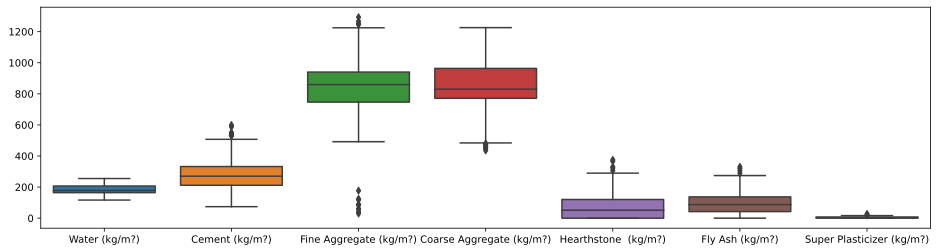

In [11]:
plt.figure(figsize=(16,4))
sns.boxplot(X)
plt.show()

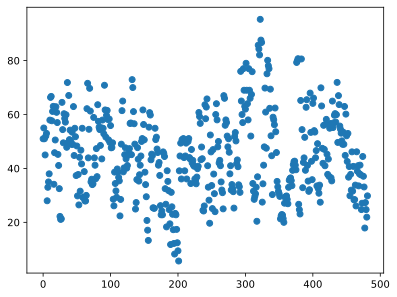

In [13]:
plt.scatter(np.arange(y.shape[0]),y)
plt.show()

In [14]:
X.corr()

,Water (kg/m?),Cement (kg/m?),Fine Aggregate (kg/m?),Coarse Aggregate (kg/m?),Hearthstone (kg/m?),Fly Ash (kg/m?),Super Plasticizer (kg/m?)
Water (kg/m?),1.000000,0.320207,-0.119241,-0.429396,-0.005954,-0.354548,-0.565196
Cement (kg/m?),0.320207,1.000000,-0.394260,-0.056856,-0.164208,-0.215827,0.092564
Fine Aggregate (kg/m?),-0.119241,-0.394260,1.000000,-0.608448,-0.084657,0.104525,0.075095
Coarse Aggregate (kg/m?),-0.429396,-0.056856,-0.608448,1.000000,0.068918,-0.022099,0.068081
Hearthstone (kg/m?),-0.005954,-0.164208,-0.084657,0.068918,1.000000,-0.569097,0.105018
Fly Ash (kg/m?),-0.354548,-0.215827,0.104525,-0.022099,-0.569097,1.000000,0.267591
Super Plasticizer (kg/m?),-0.565196,0.092564,0.075095,0.068081,0.105018,0.267591,1.000000


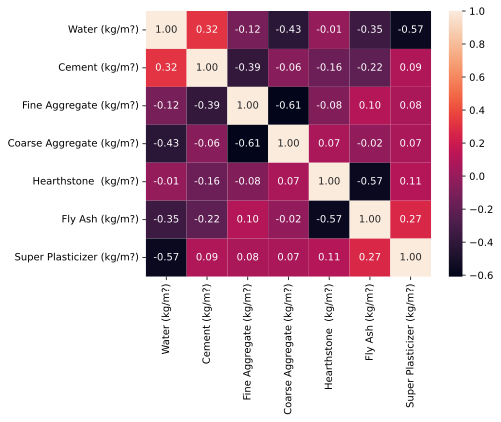

In [16]:
sns.heatmap(X.corr(),annot=True,fmt='.2f')
plt.show()

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [19]:
X = scaler.fit_transform(X)

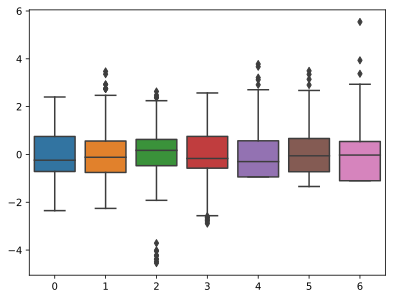

In [20]:
sns.boxplot(X)
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,Y)

LinearRegression()

In [ ]:
yhat = lr.predict(X)
print(yhat)

[0.60082981 0.6291443  0.65187361 0.55381736 0.57953729 0.59736711
 0.39924669 0.4042012  0.41417028 0.42198879 0.55446611 0.57272877
 0.61651971 0.55446611 0.57272877 0.61651971 0.55446611 0.57272877
 0.61651971 0.66144759 0.63622174 0.68315928 0.43450459 0.41601457
 0.39771682 0.44215949 0.44047195 0.43692252 0.52710561 0.47362143
 0.42692935 0.47953292 0.54490365 0.41362926 0.49035283 0.46822989
 0.50418504 0.45502855 0.47703761 0.48202824 0.43530265 0.4934797
 0.3771754  0.44506992 0.42553538 0.46174254 0.40923459 0.43303418
 0.4374955  0.38692886 0.44138539 0.33222664 0.39606389 0.37749834
 0.41180506 0.36242449 0.38481162 0.38904609 0.58298482 0.27695055
 0.34317114 0.40111609 0.37985194 0.3336211  0.28428415 0.64016831
 0.65713641 0.43969952 0.5973586  0.68055403 0.60047828 0.44423291
 0.3508257  0.32142186 0.48565277 0.62725043 0.43939706 0.42345749
 0.40801004 0.44783772 0.37461238 0.67511303 0.63329818 0.59113366
 0.57020133 0.54891932 0.50715428 0.46493995 0.61511613 0.63027

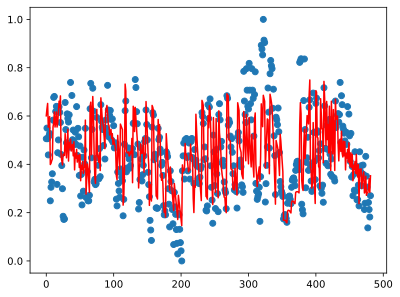

In [ ]:
plt.scatter(np.arange(Y.shape[0]),Y)
plt.plot(yhat,c='r')
plt.show()

In [ ]:
def validate(y,yhat):
  r2 = 1 - (np.sum((y-yhat)**2)/np.sum((y-np.mean(y)**2)))
  rmse = np.sqrt(np.abs((np.sum(y-yhat)))/len(y))
  mae = np.sum(y-yhat)/len(y)
  return r2,rmse,mae

In [ ]:
r2,rmse,mae = validate(Y,yhat)

In [ ]:
print(f'r2:{r2} rmse:{rmse} mae:{mae}')

r2:0.9532661280634065 rmse:6.6501617727184455e-09 mae:4.4224651603325735e-17


In [ ]:
print(f'test sd: {np.std(Y)}& pred sd: {np.std(yhat)}')

test sd: 0.17086210191527093& pred sd: 0.13297979108257332


In [ ]:

lr.coef_

array([-0.07825522,  0.11009092, -0.01671813, -0.02703598,  0.08459816,
        0.01029637,  0.0113813 ])

In [ ]:
lr.score(X,Y)

0.6057310039174006

In [ ]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X,Y)

SVR()

In [ ]:
svr.score(X,Y)

0.8024945923861398

In [ ]:
yhat = svr.predict(X)
print(yhat)

[0.49336143 0.53685972 0.60615061 0.46813428 0.52677671 0.5897759
 0.33305055 0.33962789 0.42083058 0.46097879 0.48013612 0.56605254
 0.60045288 0.48013612 0.56605254 0.60045288 0.48013612 0.56605254
 0.60045288 0.53810927 0.51489648 0.47254861 0.39332317 0.39634759
 0.39939997 0.25716765 0.2702114  0.27389928 0.60567143 0.51883025
 0.43725869 0.56324943 0.56056278 0.47477037 0.53297408 0.52518775
 0.62764591 0.49044679 0.5515951  0.56748268 0.50118013 0.51221545
 0.41875808 0.50277967 0.43346956 0.56477479 0.42722391 0.48594076
 0.51066928 0.41093471 0.44224628 0.33560169 0.43861931 0.34862032
 0.47698145 0.34549216 0.39660982 0.4216258  0.53850222 0.29385535
 0.36349136 0.38806123 0.36863259 0.34907068 0.30187115 0.62394768
 0.64684717 0.46229346 0.53704494 0.74768108 0.59083802 0.52397263
 0.35718212 0.33723272 0.56759238 0.62476558 0.46271727 0.41923519
 0.39581016 0.505991   0.33568996 0.55651593 0.60954969 0.62733049
 0.60931424 0.57259751 0.47125989 0.38893096 0.58878769 0.61073

In [ ]:
r2,rmse,mae = validate(Y,yhat)
print(f'r2:{r2} rmse:{rmse} mae:{mae}')

r2:0.9765890990214278 rmse:0.035374085336931205 mae:-0.0012513259134244914


In [ ]:
print(f'test sd: {np.std(Y)}& pred sd: {np.std(yhat)}')

test sd: 0.17086210191527093& pred sd: 0.13555437714717156


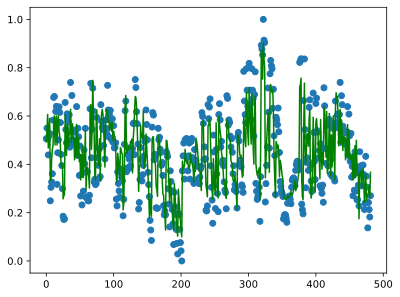

In [ ]:
plt.scatter(np.arange(Y.shape[0]),Y)
plt.plot(yhat,c='g')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfg = RandomForestRegressor()
rfg.fit(X,Y)

RandomForestRegressor()

In [ ]:
rfg.score(X,Y)

0.9660977463762663

In [ ]:
yhat = rfg.predict(X)
print(yhat)


[0.50303483 0.55366564 0.52445167 0.44390083 0.52301433 0.521635
 0.3011175  0.34807    0.35734833 0.37597    0.49270833 0.58121715
 0.61423408 0.49270833 0.58121715 0.61423408 0.49270833 0.58121715
 0.61423408 0.62528633 0.597425   0.53971667 0.4273     0.38369
 0.333715   0.24198    0.23334    0.28315    0.613155   0.55162
 0.47614    0.591315   0.56585    0.55706    0.59996    0.50005
 0.70878    0.49937    0.63643    0.536295   0.53322867 0.49586667
 0.48556    0.52923433 0.479915   0.63104967 0.435755   0.502005
 0.50796117 0.3558845  0.42668679 0.27533498 0.3763     0.2745015
 0.44215333 0.298027   0.42221033 0.42376083 0.53516    0.24818
 0.28843    0.41535    0.2782     0.29177    0.28663667 0.641085
 0.75817    0.43008667 0.54408    0.69387    0.59192    0.36695667
 0.34335617 0.33914667 0.3753     0.60733    0.42666667 0.39891167
 0.36951    0.46379    0.334905   0.61389    0.57803    0.54958
 0.5358     0.50387333 0.53294933 0.449      0.56996    0.55744
 0.5469     0.66963 

In [ ]:
r2,rmse,mae = validate(Y,yhat)
print(f'r2:{r2} rmse:{rmse} mae:{mae}')

r2:0.9959814654589743 rmse:0.03475556883872492 mae:-0.0012079495653033467


In [ ]:
print(f'test sd: {np.std(Y)}& pred sd: {np.std(yhat)}')

test sd: 0.17086210191527093& pred sd: 0.15546486200261883


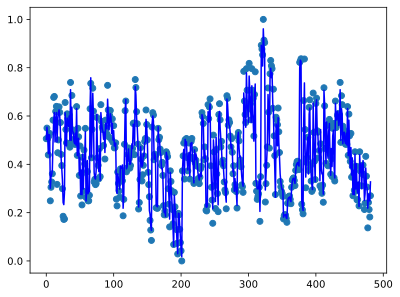

In [ ]:
plt.scatter(np.arange(Y.shape[0]),Y)
plt.plot(yhat,c='b')
plt.show()

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5,random_state=None)

In [ ]:
def kfold(model,X,Y):
  for train_idx,test_idx in kf.split(X):
    X_train,X_test = X[train_idx,:],X[test_idx,:]
    y_train,y_test = Y.iloc[train_idx],Y.iloc[test_idx]

    model.fit(X_train,y_train)
    print('Fold:')
    yhat = model.predict(X_test)
    r2,rmse,mae = validate(y_test,yhat)
    print(f'test sd: {np.std(y_test)}& pred sd: {np.std(yhat)}')
    print(f'r2:{r2} rmse:{rmse} mae:{mae}')
    print()


In [ ]:
kfold(svr,X,Y)

Fold:
test sd: 0.1393981308255972& pred sd: 0.08459680526843842
r2:0.9622331363006025 rmse:0.0723009795592967 mae:0.005227431645233839

Fold:
test sd: 0.14725698712523136& pred sd: 0.1342329151789065
r2:0.9477638445294505 rmse:0.19550806178198735 mae:-0.038223402221749386

Fold:
test sd: 0.15070149877081793& pred sd: 0.10807148953129393
r2:0.9666933541175194 rmse:0.07072132937120842 mae:0.005001506428030948

Fold:
test sd: 0.23176295866772298& pred sd: 0.092293692991085
r2:0.8377093283086419 rmse:0.2864993186522747 mae:0.08208185958821762

Fold:
test sd: 0.1400590401303044& pred sd: 0.1332534218125109
r2:0.9249513568185461 rmse:0.21409313676271052 mae:-0.04583587120889667



In [ ]:
kfold(rfg,X,Y)

Fold:
test sd: 0.1393981308255972& pred sd: 0.09217062864285544
r2:0.958859185409174 rmse:0.012435400084343523 mae:0.00015463917525769088

Fold:
test sd: 0.14725698712523136& pred sd: 0.13517667453203197
r2:0.9664329550360549 rmse:0.17660478232735793 mae:-0.031189249140893473

Fold:
test sd: 0.15070149877081793& pred sd: 0.12633616397974778
r2:0.972922120339147 rmse:0.10372682974203597 mae:-0.010759255208333318

Fold:
test sd: 0.23176295866772298& pred sd: 0.113100191298378
r2:0.8394004150322428 rmse:0.30633339810352184 mae:0.09384015079365078

Fold:
test sd: 0.1400590401303044& pred sd: 0.11909087235770818
r2:0.917976214414452 rmse:0.267889228766087 mae:-0.0717646388888889



In [ ]:
def split_test(model,X,Y):
  for i in range(2,8):
    Xs = X[:,:i]
    model.fit(Xs,Y)
    print(f'with first {i} colums')
    yhat = model.predict(Xs)
    r2,rmse,mae = validate(Y,yhat)
    print(f'test sd: {np.std(Y)}& pred sd: {np.std(yhat)}')
    print(f'r2:{r2} rmse:{rmse} mae:{mae}')
    print()

In [ ]:
split_test(svr,X,Y)

with first 2 colums
test sd: 0.17086210191527093& pred sd: 0.11111104287306009
r2:0.9353217517596599 rmse:0.049151187683104704 mae:0.0024158392506597836

with first 3 colums
test sd: 0.17086210191527093& pred sd: 0.11908993627937056
r2:0.9488308488855914 rmse:0.08328394429982172 mae:0.006936215378135807

with first 4 colums
test sd: 0.17086210191527093& pred sd: 0.12972303392192766
r2:0.9631150529739497 rmse:0.0486690267257108 mae:0.002368674162427952

with first 5 colums
test sd: 0.17086210191527093& pred sd: 0.13693925866319803
r2:0.9749418228933803 rmse:0.056158191896925044 mae:-0.0031537425171318575

with first 6 colums
test sd: 0.17086210191527093& pred sd: 0.13523415899721716
r2:0.9749848341630852 rmse:0.04737483894511925 mae:-0.0022443753650759875

with first 7 colums
test sd: 0.17086210191527093& pred sd: 0.13555437714717156
r2:0.9765890990214278 rmse:0.035374085336931205 mae:-0.0012513259134244914



In [ ]:
split_test(rfg,X,Y)

with first 2 colums
test sd: 0.17086210191527093& pred sd: 0.14597542811889047
r2:0.9858441842205475 rmse:0.061125815051173545 mae:-0.0037363652656702746

with first 3 colums
test sd: 0.17086210191527093& pred sd: 0.1481389009984528
r2:0.9911313292963583 rmse:0.04601422593128362 mae:-0.002117308988055214

with first 4 colums
test sd: 0.17086210191527093& pred sd: 0.15087951057252125
r2:0.9924315712714861 rmse:0.05014335656943708 mae:-0.002514356208049709

with first 5 colums
test sd: 0.17086210191527093& pred sd: 0.1542751914246253
r2:0.9949396746424637 rmse:0.04087816607211252 mae:-0.0016710244614192107

with first 6 colums
test sd: 0.17086210191527093& pred sd: 0.15458841648270147
r2:0.9952258524037791 rmse:0.035208920499273294 mae:-0.0012396680827241472

with first 7 colums
test sd: 0.17086210191527093& pred sd: 0.1554549582019368
r2:0.9958712095467521 rmse:0.03632568511577805 mae:-0.001319555399130659

